Lambda School Data Science

*Unit 4, Sprint 3, Module 2*

---

# Convolutional Neural Networks (Prepare)

> Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers. *Goodfellow, et al.*

## Learning Objectives
- <a href="#p1">Part 1: </a>Describe convolution and pooling
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
- <a href="#p3">Part 3: </a>Use a pre-trained convolution neural network for image classification

Modern __computer vision__ approaches rely heavily on convolutions as both a dimensionality reduction and feature extraction method. Before we dive into convolutions, let's talk about some of the common computer vision applications: 
* Classification [(Hot Dog or Not Dog)](https://www.youtube.com/watch?v=ACmydtFDTGs)
* Object Detection [(YOLO)](https://www.youtube.com/watch?v=MPU2HistivI)
* Pose Estimation [(PoseNet)](https://ai.googleblog.com/2019/08/on-device-real-time-hand-tracking-with.html)
* Facial Recognition [Emotion Detection](https://www.cbronline.com/wp-content/uploads/2018/05/Mona-lIsa-test-570x300.jpg)
* and *countless* more 

We are going to focus on classification and pre-trained classification today. What are some of the applications of image classification?

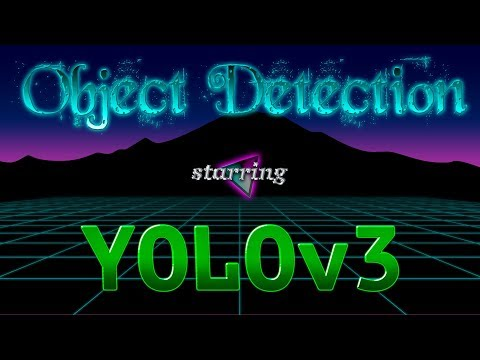

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('MPU2HistivI', width=600, height=400)

# Convolution & Pooling (Learn)
<a id="p1"></a>

## Overview

Like neural networks themselves, CNNs are inspired by biology - specifically, the receptive fields of the visual cortex.

Put roughly, in a real brain the neurons in the visual cortex *specialize* to be receptive to certain regions, shapes, colors, orientations, and other common visual features. In a sense, the very structure of our cognitive system transforms raw visual input, and sends it to neurons that specialize in handling particular subsets of it.

CNNs imitate this approach by applying a convolution. A convolution is an operation on two functions that produces a third function, showing how one function modifies another. Convolutions have a [variety of nice mathematical properties](https://en.wikipedia.org/wiki/Convolution#Properties) - commutativity, associativity, distributivity, and more. Applying a convolution effectively transforms the "shape" of the input.

One common confusion - the term "convolution" is used to refer to both the process of computing the third (joint) function and the process of applying it. In our context, it's more useful to think of it as an application, again loosely analogous to the mapping from visual field to receptive areas of the cortex in a real animal.

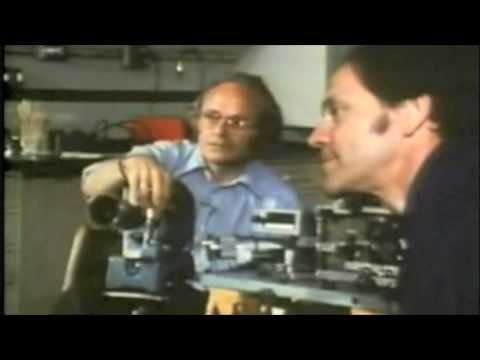

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('IOHayh06LJ4', width=600, height=400)

## Follow Along

Let's try to do some convolutions and pooling

### Convolution

Consider blurring an image - assume the image is represented as a matrix of numbers, where each number corresponds to the color value of a pixel.

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.27.17+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*


Helpful Terms:
- __Filter__: The weights (parameters) we will apply to our input image.
- __Stride__: How the filter moves across the image
- __Padding__: Zeros (or other values) around the  the input image border (kind of like a frame of zeros). 

In [ ]:
# https://setosa.io/ev/image-kernels/

In [5]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

austen = io.imread('https://dl.airtable.com/S1InFmIhQBypHBL0BICi_austen.jpg')
austen_grayscale = rescale_intensity(color.rgb2gray(austen))
austen_grayscale.shape

(400, 400)

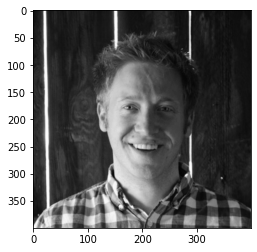

In [6]:
plt.imshow(austen_grayscale, cmap="gray");

In [7]:
austen_grayscale.shape

(400, 400)

In [9]:
import numpy as np
import scipy.ndimage as nd

horizontal_edge_convolution = np.array([[1,1,1],
                                        [0,0,0],
                                        [-1,-1,-1,]])

vertical_edge_convolution = np.array([[1, 0, -1],
                                     [1, 0, -1],
                                     [1, 0, -1]])

austen_horizontal = nd.convolve(austen_grayscale, horizontal_edge_convolution)
austen_vertical = nd.convolve(austen_grayscale, vertical_edge_convolution)

austen_horizontal.shape

(400, 400)

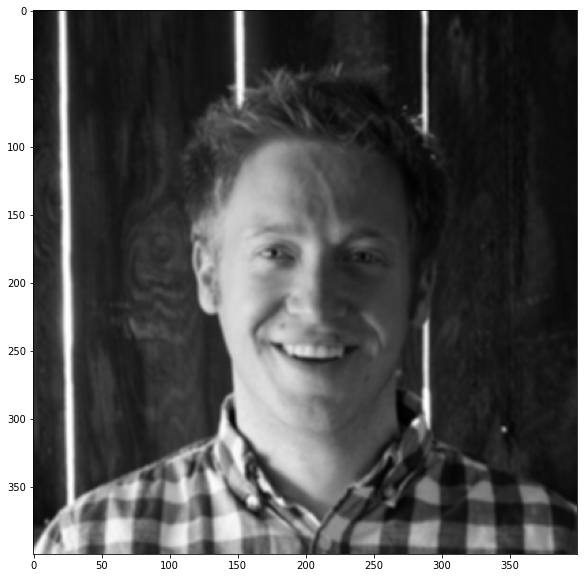

In [10]:
ones_convolution = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]])
austen_ones = nd.convolve(austen_grayscale, ones_convolution)
plt.figure(figsize=(30,10))
plt.imshow(austen_ones, cmap="gray")

In [11]:
1/9

0.1111111111111111

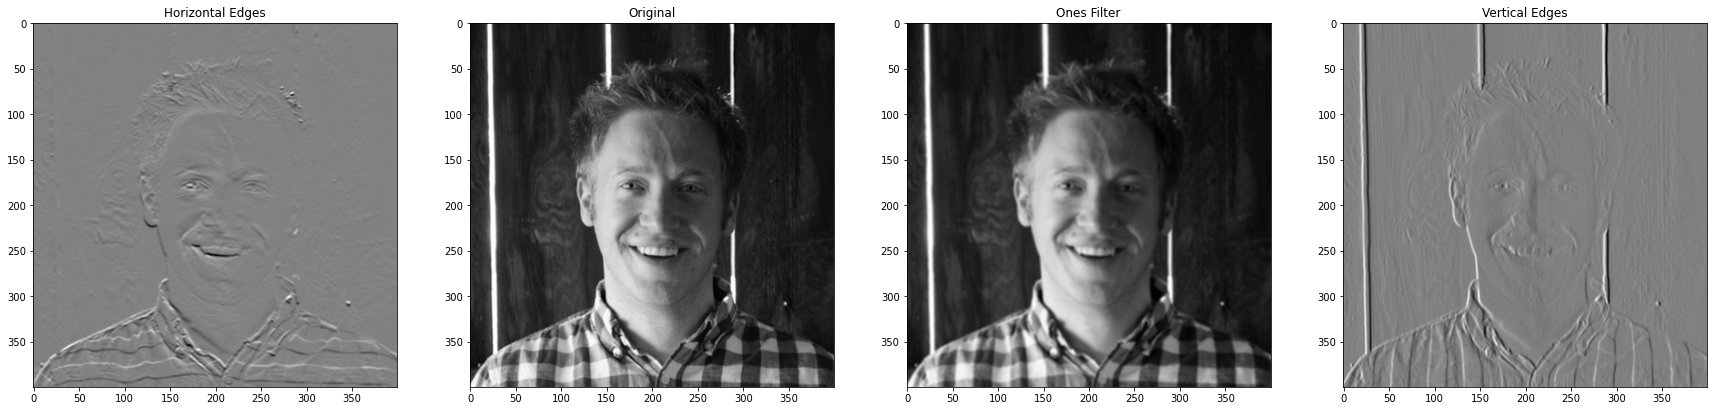

In [12]:
plt.figure(figsize=(30,10))

labels = ["Horizontal Edges", "Original", "Ones Filter", "Vertical Edges"]
images = [austen_horizontal, austen_grayscale, austen_ones, austen_vertical]

i = 0
for label, image in zip(labels, images):

    plt.subplot(1,4,i+1)
    plt.grid(False)
    plt.imshow(image, cmap="gray")
    plt.title(label)
    i += 1 

plt.show()


In [13]:
austen_horizontal.shape

(400, 400)

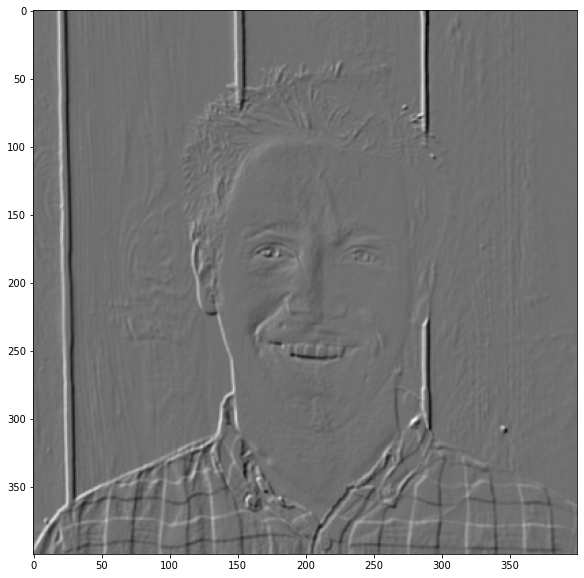

In [14]:
# combine vertical and horizontal edges
combined = austen_horizontal + austen_vertical
plt.figure(figsize=(30,10))
plt.imshow(combined, cmap="gray")

### Pooling Layer

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.26.13+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*

We use Pooling Layers to reduce the dimensionality of the feature maps. We get smaller and smaller feature set by apply convolutions and then pooling layers. 

Let's take a look very simple example using Austen's pic. 

In [15]:
from skimage.measure import block_reduce
block_reduce?

Signature:
block_reduce(
    image,
    block_size,
    func=<function sum at 0x7fb00461a700>,
    cval=0,
    func_kwargs=None,
)
Docstring:
Downsample image by applying function `func` to local blocks.

This function is useful for max and mean pooling, for example.

Parameters
----------
image : ndarray
    N-dimensional input image.
block_size : array_like
    Array containing down-sampling integer factor along each axis.
func : callable
    Function object which is used to calculate the return value for each
    local block. This function must implement an ``axis`` parameter.
    Primary functions are ``numpy.sum``, ``numpy.min``, ``numpy.max``,
    ``numpy.mean`` and ``numpy.median``.  See also `func_kwargs`.
cval : float
    Constant padding value if image is not perfectly divisible by the
    block size.
func_kwargs : dict
    Keyword arguments passed to `func`. Notably useful for passing dtype
    argument to ``np.mean``. Takes dictionary of inputs, e.g.:
    ``func_kwargs={'dt

In [17]:
from skimage.measure import block_reduce

# Perform max pooling
reduced = block_reduce(combined, (2,2), np.max)

reduced.shape

(200, 200)

In [18]:
combined.shape

(400, 400)

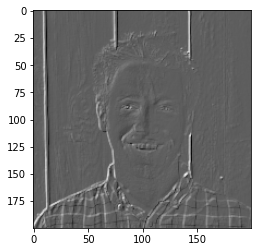

In [19]:
plt.imshow(reduced, cmap='gray')

## Challenge

You will be expected to be able to describe convolution. 

# CNNs for Classification (Learn)

## Overview

### Typical CNN Architecture

![A Typical CNN](https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/800px-Typical_cnn.png)

The first stage of a CNN is, unsurprisingly, a convolution - specifically, a transformation that maps regions of the input image to neurons responsible for receiving them. The convolutional layer can be visualized as follows:

![Convolutional layer](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)

The red represents the original input image, and the blue the neurons that correspond.

As shown in the first image, a CNN can have multiple rounds of convolutions, [downsampling](https://en.wikipedia.org/wiki/Downsampling_(signal_processing)) (a digital signal processing technique that effectively reduces the information by passing through a filter), and then eventually a fully connected neural network and output layer. Typical output layers for a CNN would be oriented towards classification or detection problems - e.g. "does this picture contain a cat, a dog, or some other animal?"


#### A Convolution in Action

![Convolution](https://miro.medium.com/max/1170/1*Fw-ehcNBR9byHtho-Rxbtw.gif)



Why are CNNs so popular?
1. Compared to prior image learning techniques, they require relatively little image preprocessing (cropping/centering, normalizing, etc.)
2. Relatedly, they are *robust* to all sorts of common problems in images (shifts, lighting, etc.)

Actually training a cutting edge image classification CNN is nontrivial computationally - the good news is, with transfer learning, we can get one "off-the-shelf"!

In [ ]:
# CNNs from different viewpoints
# https://medium.com/impactai/cnns-from-different-viewpoints-fab7f52d159c

## Follow Along

In [20]:
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model # <- May Use
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [22]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 7s 0us/step


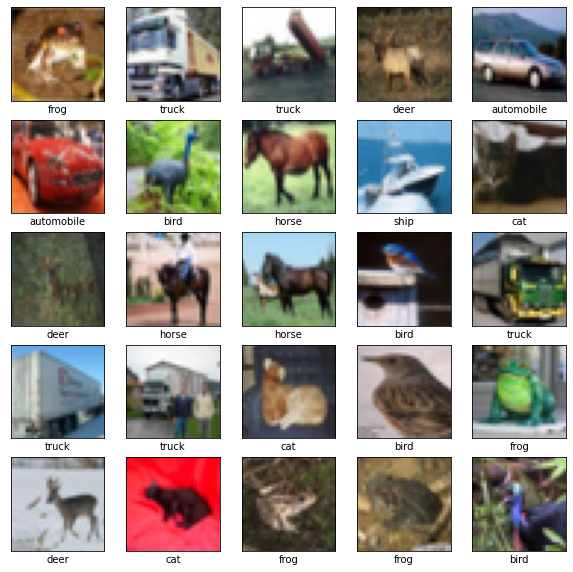

In [23]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [24]:
train_images[0].shape

(32, 32, 3)

In [25]:
train_labels[1]

array([9], dtype=uint8)

In [26]:
32*32*3

3072

In [27]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [28]:
Conv2D?

Init signature: Conv2D(*args, **kwargs)
Docstring:     
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `data_format="channels_last"`.

Examples:

>>> # The inputs are 28x28 RGB images with `channels_last` and the batch
>>> # size is 4.
>>> input_shape = (4, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', input_shape=input_shape[1:])(x)
>>> print(y.shape)
(4, 26, 26, 2)

>>> # With `dilation_rate` as 2.
>>> input_shape = (4, 28, 28, 3)
>>> x = 

In [68]:
# Setup Architecture

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_images[0].shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 64)         

In [61]:
# Compile Model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
# Fit Model
results = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6648 - accuracy: 0.3864 - val_loss: 1.3533 - val_accuracy: 0.5130
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3104 - accuracy: 0.5311 - val_loss: 1.2080 - val_accuracy: 0.5656
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1851 - accuracy: 0.5766 - val_loss: 1.0572 - val_accuracy: 0.6306
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1095 - accuracy: 0.6119 - val_loss: 1.0238 - val_accuracy: 0.6319
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0527 - accuracy: 0.6300 - val_loss: 0.9668 - val_accuracy: 0.6577
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0007 - accuracy: 0.6454 - val_loss: 0.9176 - val_accuracy: 0.6734
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9635 - accuracy: 0.6623 - val_loss: 0.9264 -

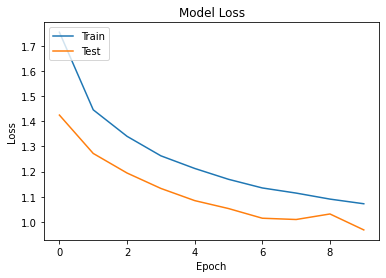

In [32]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

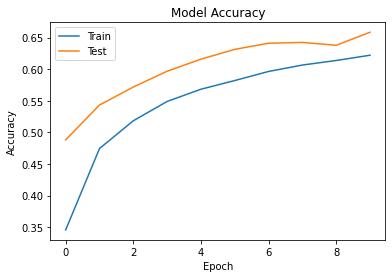

In [33]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

In [ ]:
# https://paperswithcode.com/sota/image-classification-on-cifar-10

In [34]:
# Evaluate Model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.9680 - accuracy: 0.6584


In [35]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [36]:
np.array([train_images[0]]).shape

(1, 32, 32, 3)

In [38]:
from tensorflow import keras
# Extract intermediate output
layer_name = 'flatten'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(np.array([train_images[5]]))
intermediate_output = intermediate_output.numpy()
intermediate_output

array([[0.        , 0.        , 0.05651998, 0.5349449 , 0.        ,
        0.        , 0.        , 0.        , 0.05945402, 0.01549386,
        0.7306418 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.12053044, 0.58471143, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.8526263 , 0.        , 0.        , 0.        , 0.        ,
        0.735842  , 0.        , 0.        , 0.        , 0.02411781,
        0.21512705, 0.26482186, 0.48402888, 0.02426504, 0.        ,
        0.27139473, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13336667, 0.        , 0.5625676 ,
        0.        , 0.20596638, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.7989736 , 0.        , 0.        ,
        0.        , 0.10782235, 0.77001977, 0.        , 0.        ,
        0.        , 0.42829922, 0.13951564, 0.06

In [39]:
intermediate_output.shape

(1, 512)

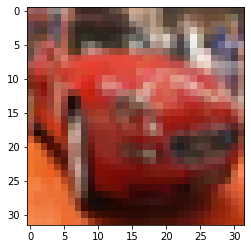

In [40]:
# Display image
plt.imshow(train_images[5], cmap='gray')

In [41]:
intermediate_output.shape

(1, 512)

In [42]:
# Embedded image vs original flattened image
train_images[5].flatten().shape

(3072,)

## Challenge

You will apply CNNs to a classification task in the module project.

# Transfer Learning for Image Classification (Learn)

## Overview

### Transfer Learning Repositories

#### TensorFlow Hub

"A library for reusable machine learning modules"

This lets you quickly take advantage of a model that was trained with thousands of GPU hours. It also enables transfer learning - reusing a part of a trained model (called a module) that includes weights and assets, but also training the overall model some yourself with your own data. The advantages are fairly clear - you can use less training data, have faster training, and have a model that generalizes better.

https://www.tensorflow.org/hub/

TensorFlow Hub is very bleeding edge, and while there's a good amount of documentation out there, it's not always updated or consistent. You'll have to use your problem-solving skills if you want to use it!

#### Keras API - Applications

> Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

There is a decent selection of important benchmark models. We'll focus on an image classifier: ResNet50.

In [43]:
import tensorflow as tf
import os

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 5s 0us/step


In [44]:
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'validation')

In [45]:
batch_size = 128
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, 
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = val_image_generator.flow_from_directory(batch_size=batch_size, 
                                                           directory=val_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [47]:
# Tensorflow hub example
import tensorflow_hub as hub

model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280],
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.build([None, IMG_HEIGHT, IMG_WIDTH, 3])

In [48]:
IMG_HEIGHT*IMG_WIDTH*3

150528

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [50]:
# Compile and train

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_data_gen,
          steps_per_epoch=2000//batch_size,
          epochs=epochs,
          validation_data=val_data_gen)

Epoch 1/10
15/15 [==============================] - 413s 28s/step - loss: 0.5024 - accuracy: 0.7564 - val_loss: 0.2597 - val_accuracy: 0.9450
Epoch 2/10
15/15 [==============================] - 406s 27s/step - loss: 0.1825 - accuracy: 0.9621 - val_loss: 0.1352 - val_accuracy: 0.9670
Epoch 3/10
15/15 [==============================] - 410s 27s/step - loss: 0.1139 - accuracy: 0.9712 - val_loss: 0.0985 - val_accuracy: 0.9770
Epoch 4/10
15/15 [==============================] - 230s 15s/step - loss: 0.0908 - accuracy: 0.9760 - val_loss: 0.0838 - val_accuracy: 0.9800
Epoch 5/10
15/15 [==============================] - 105s 7s/step - loss: 0.0772 - accuracy: 0.9781 - val_loss: 0.0763 - val_accuracy: 0.9820
Epoch 6/10
15/15 [==============================] - 114s 8s/step - loss: 0.0692 - accuracy: 0.9792 - val_loss: 0.0700 - val_accuracy: 0.9850
Epoch 7/10
15/15 [==============================] - 115s 8s/step - loss: 0.0627 - accuracy: 0.9808 - val_loss: 0.0644 - val_accuracy: 0.9840
Epoch 8/1

In [51]:
model.save('my_dogs_and_cats_model.h5')

## Follow Along

In [52]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_banana(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if entry[1] == 'banana':
      return entry[2]
  return 0.0

In [53]:
import requests

image_urls = ["https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/negative_examples/example11.jpeg",
              "https://github.com/LambdaSchool/ML-YouOnlyLookOnce/raw/master/sample_data/positive_examples/example0.jpeg"]

for _id,img in enumerate(image_urls): 
    r = requests.get(img)
    with open(f'example{_id}.jpg', 'wb') as f:
        f.write(r.content)

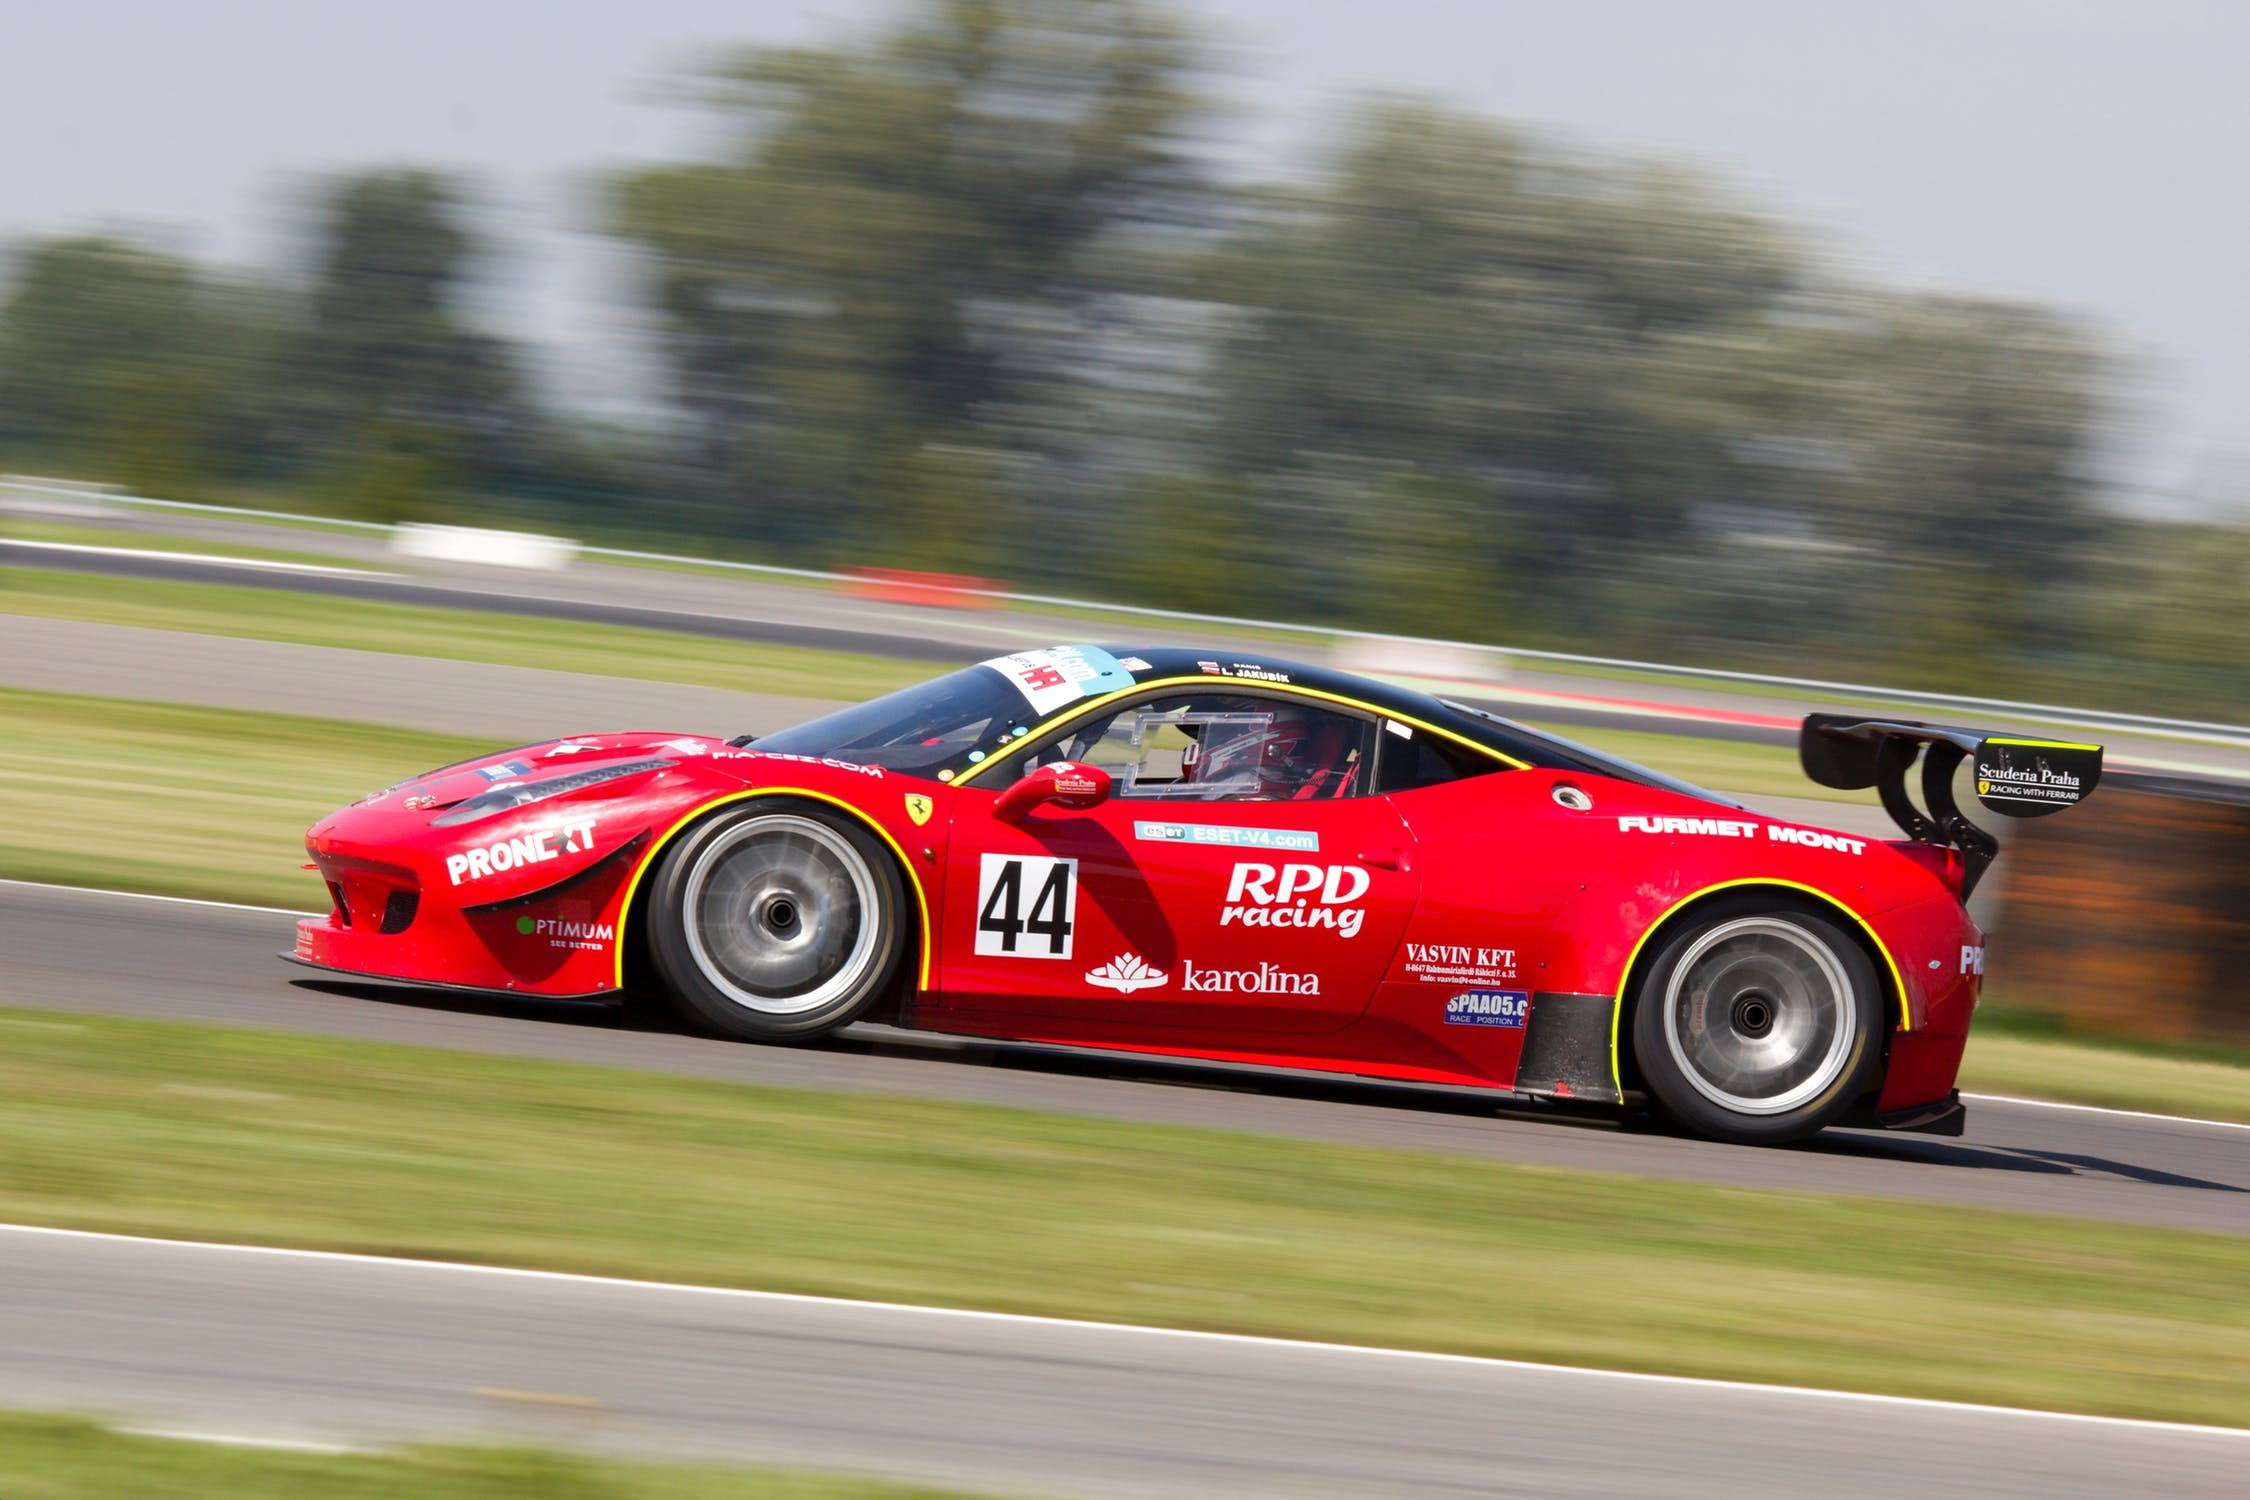

In [54]:
from IPython.display import Image
Image(filename='./example0.jpg', width=600)

In [55]:
img_contains_banana(process_img_path('example0.jpg'))

40960/35363 [==================================] - 0s 0us/step
[('n04037443', 'racer', 0.9256286), ('n04285008', 'sports_car', 0.07028751), ('n04461696', 'tow_truck', 0.0021220413)]


0.0

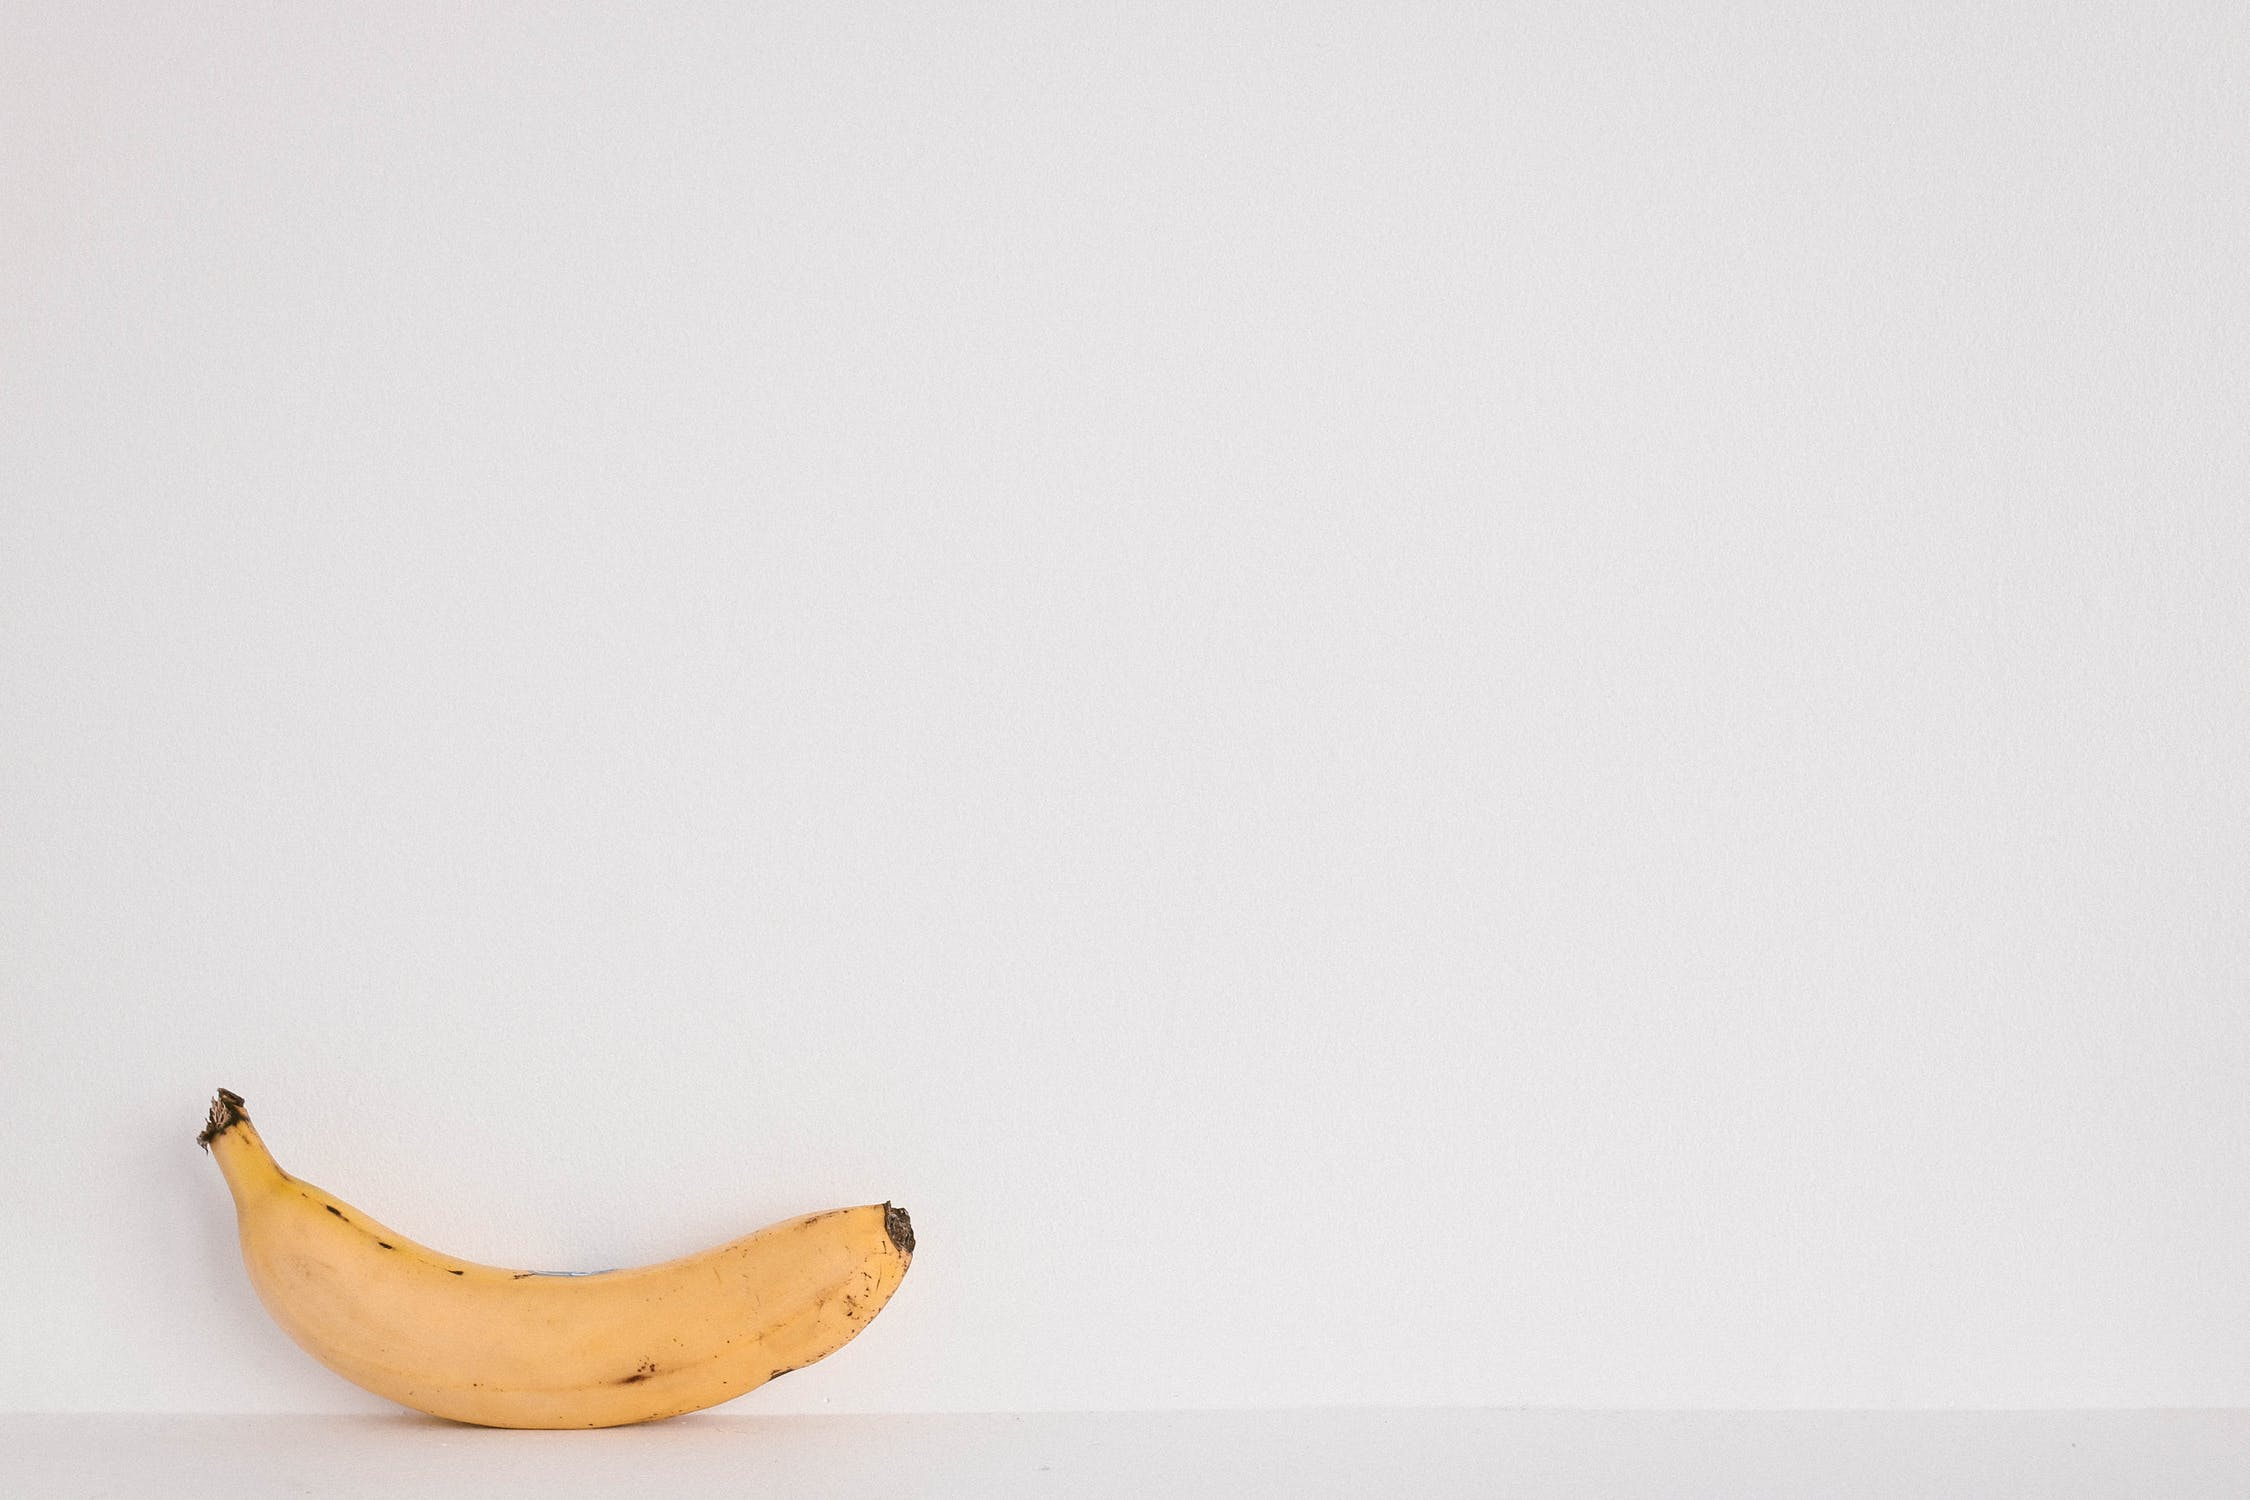

In [56]:
Image(filename='example1.jpg', width=600)

In [57]:
img_contains_banana(process_img_path('example1.jpg'))

[('n03532672', 'hook', 0.077739336), ('n07753592', 'banana', 0.07015067), ('n03498962', 'hatchet', 0.063320726)]


0.07015067

In [ ]:
# !wget https://www.tasteofhome.com/wp-content/uploads/2018/07/08-Foods-Queen-Elizabeth-II-Would-Never-Ever-Eat-shutterstock_331719362.jpg -O bananas.jpg

In [59]:
# img_contains_banana(process_img_path('bananas.jpg'))

Notice that, while it gets it right, the confidence for the banana image is fairly low. That's because so much of the image is "not-banana"! How can this be improved? Bounding boxes to center on items of interest.

## Challenge

You will be expected to apply a pretrained model to a classificaiton problem today. 

# Review

- <a href="#p1">Part 1: </a>Describe convolution and pooling
    * A Convolution is a function applied to another function to produce a third function
    * Convolutional Kernels are typically 'learned' during the process of training a Convolution Neural Network
    * Pooling is a dimensionality reduction technique that uses either Max or Average of a feature map region to downsample data
- <a href="#p2">Part 2: </a>Apply a convolutional neural network to a classification task
    * Keras has layers for convolutions :) 
- <a href="#p3">Part 3: </a>Transfer Learning for Image Classification
    * Check out both pretinaed models available in Keras & TensorFlow Hub

# Sources

- *_Deep Learning_*. Goodfellow *et al.*
- *Hands-on Machine Learnign with Scikit-Learn, Keras & Tensorflow*
- [Keras CNN Tutorial](https://www.tensorflow.org/tutorials/images/cnn)
- [Tensorflow + Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
- [Convolution Wiki](https://en.wikipedia.org/wiki/Convolution)
- [Keras Conv2D: Working with CNN 2D Convolutions in Keras](https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/)
- [Intuitively Understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)
- [A Beginner's Guide to Understanding Convolutional Neural Networks Part 2](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/)